# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

    Задачи
    Изучить следующие параметры объектов:
     
        общая площадь;
        жилая площадь;
        площадь кухни;
        цена объекта;
        количество комнат;
        высота потолков;
        этаж квартиры;
        тип этажа квартиры («первый», «последний», «другой»);
        общее количество этажей в доме;
        расстояние до центра города в метрах;
        расстояние до ближайшего аэропорта;
        расстояние до ближайшего парка;
        день и месяц публикации объявления.
        Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.
    Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
     
        Постройте гистограмму.
        Посчитайте среднее и медиану.
        В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
    Какие факторы больше всего влияют на общую (полную) стоимость объекта?
     Изучите, зависит ли цена от:
        общей площади;
        жилой площади;
        площади кухни;
        количества комнат;
        этажа, на котором расположена квартира (первый, последний, другой);
        даты размещения (день недели, месяц, год).
        Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
    Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
    Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Описание данных

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [2]:
try:
    data = pd.read_csv('/home/oslik/Yandex_curs_DS/Project_2/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

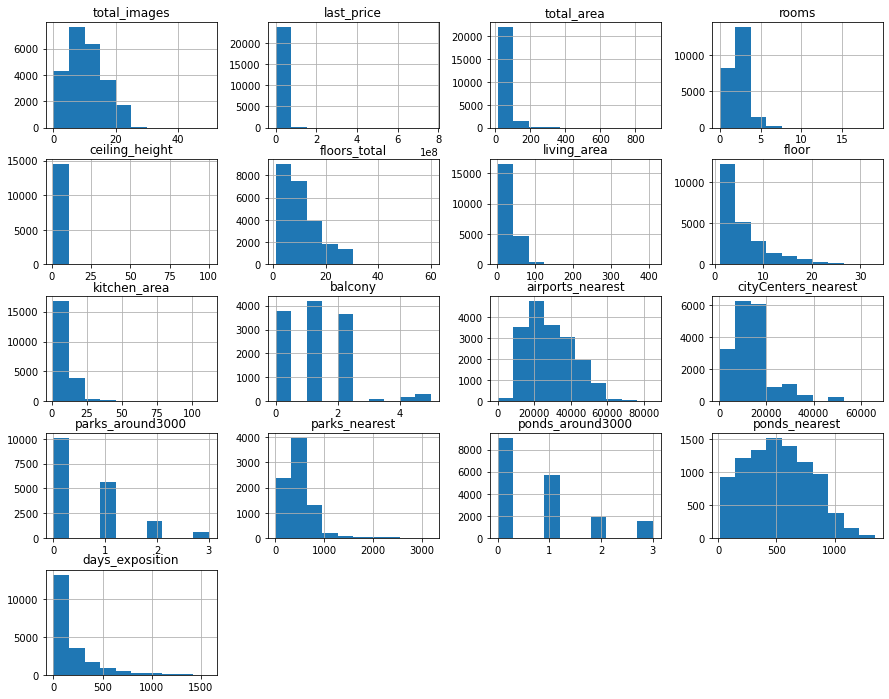

In [8]:
data.hist(figsize=(15, 12));

#### краткие выводы:
при первом изучении были обнаружены пропуски в следующих данных: 
- `ceiling_height     ` (высота потолков (м))                9195
- `floors_total       ` (всего этажей в доме)                86
- `living_area        ` (жилая площадь)                      1903
- `is_apartment       ` (апартаменты)                        20924
- `kitchen_area       ` (площадь кухни)                      2278
- `balcony            ` (число балконов)                     11519
- `locality_name      ` (название населённого пункта)        49
- `airports_nearest   ` (расстояние до ближайшего аэропорта) 5542
- `cityCenters_nearest` (расстояние до центра города)        5519
- `parks_around3000   ` (число парков в радиусе 3 км)        5518
- `parks_nearest      ` (расстояние до ближайшего парка)     15620
- `ponds_around3000   ` (число водоёмов в радиусе 3 км)      5518
- `ponds_nearest      ` (расстояние до ближайшего водоёма)   14589
- `days_exposition    ` (дата публикации)                    3181


<br>неверный типа данных имеют столбцы:
<br> is_apartment тип object должен быть bool
<br> airports_nearest, city_centers_nearest, parks_around3000, parks_nearest,ponds_around3000, ponds_nearest, days_exposition balcony, floors_total, last_price имеют тип данных float64 а посодержанию int64
<br> судя по первичным гисторгаммам аномальные значения присутствуют в столбцах:
<br> total_images, total_area, last_price, kitchen_area, rooms, ceiling_height, floors_total, living_area, kitchen_area, days_exposition
     имя столбца 'cityCenters_nearest' не соответствует принятому виду

### Предобработка данных

#### рассмотрим данные по высоте потолков

In [9]:
data['ceiling_height'].sort_values().nunique()

183

в столбце с цказанием высоты потолка слишком разнородные данные, также присутствуют аномальные значения. больше 10 метров
стандартная высота потолка для жилых помещений не может быть меньше 2,5 метров, а максимальная высота, обычно, находися в районе 3,5 метров
по этому можно предположить, что аномальные значения в диапозоне от 25 до 35 обусловлены ошибкой ввода и их можно преобразовать в допустимые путем деления на 10.

значения больше 3,5 метров опустим до максимального значения,  меньше 2,5 поднимем до минимального. пропускам присвоим медиану
в последствии разделим данные по категориям (высокие, средние)

In [10]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
data.loc[(data['ceiling_height'] >= 25), 'ceiling_height'] = data['ceiling_height'] / 10

In [12]:
data.loc[(data['ceiling_height'] < 2.5) , 'ceiling_height'] = 2.5

In [13]:
data.loc[(data['ceiling_height'] >3.5), 'ceiling_height'] = 3.5

In [14]:
data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = data['ceiling_height'].median()

в высоте потолков сантиметры роли играть не будут, по этому округлим значения до десятых

In [15]:
data['ceiling_height'] = round(data['ceiling_height'], 1)

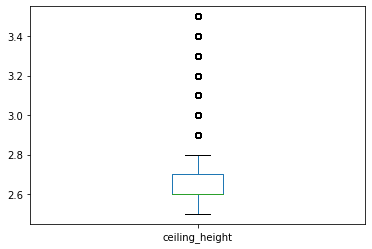

In [16]:
data['ceiling_height'].plot(kind='box');

In [17]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.676446
std          0.202115
min          2.500000
25%          2.600000
50%          2.600000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

In [18]:
print(data['ceiling_height'].sort_values().unique())

[2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5]


значения приведены к нормальному виду. в дальнейшем они будут разбиты на 2 категории:
- средняя высота потолка (< 2.7)
- высокий потолок (> 2,7м)

#### рассмотрим данные указывающие на апартаменты

In [19]:
data['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

логично предположить, что могут быть или аппартаменты или нет. приведем данные к булевым значениям.
также заменим пропуски значением False.

In [20]:
data.loc[(data['is_apartment']!=True), 'is_apartment'] = False

In [21]:
data['is_apartment'] = data['is_apartment'].astype('bool')

#### рассмотрим данные о балконах

In [22]:
data['balcony'].isna().sum()

11519

логично предположить, что если не указанно число балконов, значит их нет. прировняем пропущенные начения к 0. также приведем тип данных к целочисленным

In [23]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [24]:
data['balcony'] = data['balcony'].astype(int)

In [25]:
data['balcony'].describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

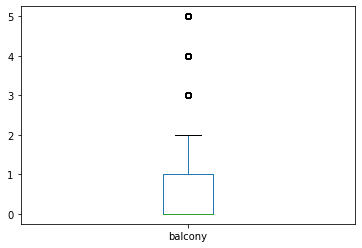

In [26]:
data['balcony'].plot(kind='box');

от 3 до 5 балконов похоже на выбросы. удалить и изменить эти данные не получится, оставим как есть

#### рассмотрим данные о населенных пунктах

In [27]:
len(data.loc[data['locality_name'].isna()])

49

учитывая что объектов без местоположения всего 49 штук и они не смогут внести существенные изменения в расчеты - целесообразнее избавится от таких строк, что будет сделано в конце этапа, временно заполним заглушками

Не могу их сейчас не заполнить, иначе будет поиск подстроки выпадать в ошибку. В конце этапа удалю все лишние данные. забыл это сделать при первой попытке

In [28]:
data['locality_name'].fillna('NaN', inplace=True)

In [29]:
len(data.loc[data['locality_name'].isna()])

0

проверим данные которые есть в столбце

In [30]:
data['locality_name'].nunique()

365

365 уникальных значения... выводить все смысла нет.

в данных встречается разное написание названия для одного населенного пункта. исправим эту ситуацию
для этого напишем функцию и оставим только одно значение для каждой локации

In [31]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [32]:
dicts=dict()
items=[]
for i in data['locality_name'].unique():
    if 'типа' in i: 
        items[0] = i
    else:
        items = i.split()
        for num in range(len(items)):
            if items[num].istitle():
                items[num] = ' '.join(items[num:])
                items = items[: num + 1]
                break
    if not dicts.get(items[-1]):
        dicts[items[-1]] = i

        
def edit_locality_name(name_sity: str):
    if 'типа' in name_sity: 
        return name_sity
    else:
        name_sity = name_sity.split()
        for num in range(len(name_sity)):
            if name_sity[num].istitle():
                name_sity[num] = ' '.join(name_sity[num:])
                name_sity = name_sity[: num + 1]
                break
    return dicts[name_sity[-1]]

In [33]:
data['locality_name'] = data['locality_name'].apply(edit_locality_name)

In [34]:
data['locality_name'].nunique()

316

было изменено 48 повторяющихся значений из 364.

#### посмотрим на данные в столбцах заполненных автоматически (данные о парках и водоемах, растояние до центра, аэропорта)

в начале приведем имя столбца к принятому виду.

In [35]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [36]:
'{0:.1%}'.format(len(data[data['city_centers_nearest'].isna()])
 / len(data['city_centers_nearest']))

'23.3%'

отсутствующих данных 23,3% от общего числа записей, их удаление может существеннно повлиять на итоговое решение удалять их не имеет смысла.

In [37]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [38]:
def locality_nearest(col_name: str):
    
    for i in data['locality_name'].unique():
        s=data.loc[data['locality_name'] == i, col_name]
        
        if max(s)>0:
            cou = len(data.query(
                    f'locality_name == @i and {col_name} > 0'))
            print(
                f'{i:<30} {int(min(s)):<9} {int(max(s)):<9} всего: {len(s):<6} c данными {cou:<6} пропущено {len(s) - cou}')

In [39]:
locality_nearest('city_centers_nearest')

Санкт-Петербург                181       29493     всего: 15721  c данными 15660  пропущено 61
поселок Шушары                 17012     32079     всего: 440    c данными 436    пропущено 4
поселок Парголово              17994     24415     всего: 327    c данными 327    пропущено 0
Ломоносов                      36816     61495     всего: 133    c данными 132    пропущено 1
Петергоф                       29815     49574     всего: 201    c данными 201    пропущено 0
Пушкин                         24311     35610     всего: 369    c данными 368    пропущено 1
Колпино                        29436     37477     всего: 338    c данными 337    пропущено 1
Кронштадт                      46657     51511     всего: 96     c данными 95     пропущено 1
поселок Металлострой           26696     29217     всего: 66     c данными 66     пропущено 0
Павловск                       31533     36445     всего: 38     c данными 38     пропущено 0
Сестрорецк                     31130     42971     всего: 1

в столбце данные растояний указаны в метрах до центра города Санкт-Петербург
для заполнения пропущенных значений не достаточно информации в текущем наборе данных.
в качестве заполнителя, для маленьких населенных пунктов можно было взять растояние от их центра до центра города Санкт-Петербург, однако таких данных нати не удалось.
заполнять медианым значением по всем данным будет не корректно, так как они могут оказаться на значительном растоянии от фактического местонахождения обьекта недвижимости. 
также учиттывая, что по категориям пропущено малое число данных, они не повлияют на конечный результат их можно заменить заглушками

аналогичным образом рассмотрим данные для столбцов: 
* parks_around3000 
* parks_nearest    
* ponds_around3000 
* ponds_nearest
* airports_nearest

In [40]:
data['parks_nearest'].isna().sum()

15620

In [41]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [42]:
data['parks_around3000'].isna().sum()

5518

In [43]:
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [44]:
len(data[(data['parks_around3000'] == 0) | data['parks_around3000'].isna()])

15624

Учитывая, что данные в столбцах картографические и заполнять их вычисляемыми значениями некорректно.
Удалить данные нельзя, тк обьем данных значительный.
<br>Есть 2 варианта решения вопроса:
<br>1 заполнить залушками;
<br>2 оставить как есть. 
<br>Остановимся на втором варианте.
<br>Изменим тип данных на Int64

In [45]:
for name in ['parks_nearest', 'parks_around3000']:
    data[name] = np.floor(pd.to_numeric(data[name], errors='coerce')).astype('Int64')

In [46]:
data['ponds_nearest'].isna().sum()

14589

In [47]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [48]:
data['ponds_around3000'].isna().sum()

5518

In [49]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [50]:
len(data[(data['ponds_around3000'] == 0) | data['ponds_around3000'].isna()])

14589

Учитывая, что данные в столбцах картографические и заполнять их вычисляемыми значениями некорректно.
Удалить данные нельзя, тк обьем данных значительный.
<br>Есть 2 варианта решения вопроса:
<br>1 заполнить залушками;
<br>2 оставить как есть. 
<br>Остановимся на втором варианте.
<br>Изменим тип данных на Int64

In [51]:
for name in ['ponds_nearest', 'ponds_around3000']:
    data[name] = np.floor(pd.to_numeric(data[name], errors='coerce')).astype('Int64')

посмотрим на строки с растоянием до аэропорта

In [52]:
locality_nearest('airports_nearest')

Санкт-Петербург                0         54784     всего: 15721  c данными 15635  пропущено 86
поселок Шушары                 9294      26293     всего: 440    c данными 436    пропущено 4
поселок Парголово              44346     61748     всего: 327    c данными 327    пропущено 0
Ломоносов                      46502     56896     всего: 133    c данными 132    пропущено 1
Петергоф                       34626     46535     всего: 201    c данными 201    пропущено 0
Пушкин                         12157     21055     всего: 369    c данными 369    пропущено 0
Колпино                        23649     31691     всего: 338    c данными 337    пропущено 1
Кронштадт                      64931     69785     всего: 96     c данными 95     пропущено 1
поселок Металлострой           24629     26729     всего: 66     c данными 66     пропущено 0
Павловск                       19380     24291     всего: 38     c данными 38     пропущено 0
Сестрорецк                     50031     61872     всего: 1

так как отсутствуют дополнительные данные для обогащения и столбцы по локализации заполнены автоматически - пустые значения заменить данными, которые будут участвовать в расчетах нежелательно, заполним заглушками

Вопрос: 
* корректно ли будет заполнять отсутствующие значение для аэропорта и центра средним, между максимальным и минимальным значением, по группам основанным на названиях населенных пунктов или медианой?
* для Питера и больших городов это не получится, а для мелких населенных пунктов?

приведем данные с локализацией к целочисленному типу и заменим пропущенные значения заглушками  

In [53]:
for name in ['city_centers_nearest', 'airports_nearest']:
    data[name] = np.floor(pd.to_numeric(data[name], errors='coerce')).astype('Int64')


#### рассмотрим данные о этажности здания

In [54]:
data[data['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.6,NaN,30.80,4,False,False,False,12.00,0,Санкт-Петербург,39197,12373,1,123,0,<NA>,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.6,NaN,20.75,1,False,False,False,NaN,0,Санкт-Петербург,22041,17369,0,<NA>,1,374,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.6,NaN,38.40,12,False,False,False,10.63,0,Санкт-Петербург,37364,8322,2,309,2,706,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.6,NaN,47.10,8,False,False,False,16.80,0,Санкт-Петербург,22041,17369,0,<NA>,1,374,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.6,NaN,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735,11618,1,835,1,652,77.0


In [55]:
data[data['floors_total'].isna()].pivot_table(
    index=[
        data[data['floors_total'].isna()].index,'locality_name'],
    values=['floor', 'city_centers_nearest', 'airports_nearest'],
    aggfunc=('min'))

,,airports_nearest,city_centers_nearest,floor
,locality_name,,,
186,Санкт-Петербург,39197,12373,4
237,Санкт-Петербург,22041,17369,1
457,Санкт-Петербург,37364,8322,12
671,Санкт-Петербург,22041,17369,8
1757,Санкт-Петербург,22735,11618,9
...,...,...,...,...
22542,Санкт-Петербург,51340,15363,3
22656,Санкт-Петербург,22041,17369,20
22808,Санкт-Петербург,19095,4529,6


как видно из таблицы имеются разнородные данные по пропущенным значеням этажности зданий. сказать с уверенностью, что это последний этаж или в скольки этажном здании  находится квартира нельзя, но можно поискать по двум точкам местоположения (удаленность от центра, растояние от аэропорта) так как они находятся в разных местах, при этом сравнить этажность здания. однако учитывая, что пропущенных данных менее 1% их можно удалить.

In [56]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

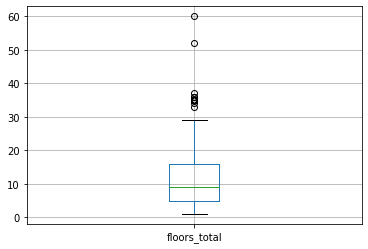

In [57]:
data['floors_total'].plot(kind='box', grid=True)

на графике присутствуют выбросы в районе 50-60 этажей и 30-40. максимальная высота зданий в Санкт-Петербурге и Ленинградской области 37 этажей. в всязи с чем два значения выбивающиеся из даных (больше 50) можно отбросить, но пока закроем заглушками

In [58]:
data[data['floors_total'] > 50] = -1

избавимся от пропусков и поменяем тип данных на int

In [59]:
data = data[~data['floors_total'].isna()]

In [60]:
data['floors_total'] = data['floors_total'].astype(int)

In [61]:
data['floors_total'].sort_values().unique()

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36,
       37])

<AxesSubplot:>

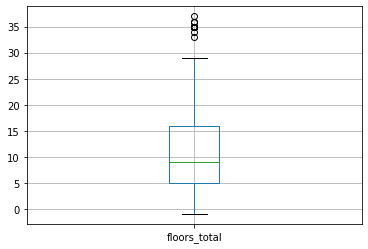

In [62]:
data['floors_total'].plot(kind='box', grid=True)

 значительных выбросов нет. данные укладываются в этажность застройки. осталось изменить тип данных на целочисленный

In [63]:
data['floors_total'] = data['floors_total'].astype(int)

#### рассмотрим данные по этажам, на которых находится объект недвижимости

In [64]:
data['floor'].sort_values().unique()

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [65]:
data['floor'].describe()

count    23613.000000
mean         5.876297
std          4.873296
min         -1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

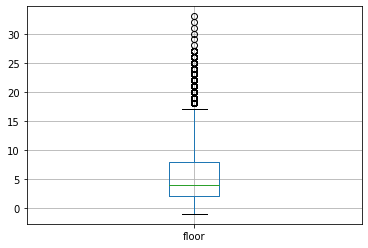

In [66]:
data['floor'].plot(kind='box', grid=True)

тут все хорошо, данные вкладываются малоэтажность застройки Санкт-Петербурга, так как основная доля данных распределена по городу.

 есть значение с отрицательным этажом, нужно избавится от этих данных, но пока оставим как есть

меняем тип данных

In [67]:
data['floor'] = data['floor'].astype(int)

#### рассмотрим данные по числу фотографий

In [68]:
data['total_images'].describe()

count    23613.000000
mean         9.873544
std          5.682403
min         -1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

<AxesSubplot:>

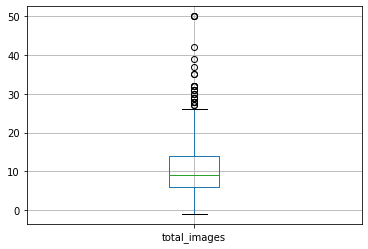

In [69]:
data['total_images'].plot(kind='box', grid=True)

In [70]:
sum(data['total_images'] >= 25)

31

есть странные данные с отрицательным числом фотографий. кто-то уже редактировал набор, ошибка при выгрузке или остаток тестовых данных?

также есть выбросы в диапозоне от 25 фотографий и больше. удалим данные в конце этапа

In [71]:
data[data['total_images']==-1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,-1,-1.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1.0
16731,-1,-1.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1.0


все строки заполнены заглушками. это мусор. надо их удалить, иначе они будут постоянно вылезать и мешать при предобработке

In [72]:
data['total_images'] = data['total_images'].astype(int)

#### рассмотрим данные по последней цене

In [73]:
pd.options.display.float_format = '{:,.2f}'.format
data['last_price'].describe()

count        23,613.00
mean      6,540,226.07
std      10,901,861.58
min              -1.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

посмотрим указывал ли кто-то копейки в стоимости, внести корректировку в стоимость они не смогут, просто интересно

In [74]:
cou = 0
for i in data['last_price']:
    if i % 1 > 0:
        cou += 1
if not cou:
    print('копеек нет')
else: print('цен с копейками:', cou)

копеек нет


интересная минимальная стоимость 12,190. посмотрим что там за данные

In [75]:
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,"12,190.00",109.00,2019-03-20T00:00:00,2,2.80,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421,9176,1,805,0,<NA>,8.00


In [76]:
data['last_price'] = data['last_price'].astype(int)

In [77]:
data[
    (data['total_area'] > 90) &
    (data['total_area'] < 120) &
    (data['locality_name'] == 'Санкт-Петербург')
]['last_price'].median()

11750000.0

средняя стоимость квартир для Санкт-Петербурга площадью от 90 до 120 метров равна 11790000р. скорее всего кто-то ошибся с нулямию исправим

In [78]:
data.loc[data['last_price'] == 12190, 'last_price'] = 12190000

In [79]:
def sqrt_last_price(x: int):
    while x < 10**6 and x > 0:
        x *= 10
    return x

In [80]:
data.loc[data['last_price'] < 10**6, 'last_price'] = \
data.loc[data['last_price'] < 10**6, 'last_price'].agg(sqrt_last_price)

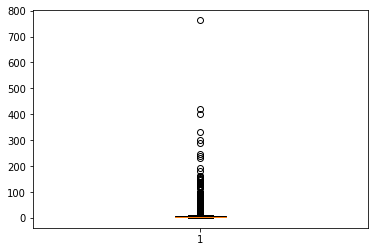

In [81]:
matplotlib.pyplot.boxplot(data['last_price']/10**6);

75% процентов данных располоагаются на отметке до 7 млн. рассмотрев данные, которые распределены на отметке до 20 млн
можно предположить, что выше этой отметки еденичные предложения, которое может исказить финальные выводы.
скорее всего верным решением будет просто не учитывать эти выбросы при анализе стоимости

In [82]:
data.loc[data['last_price'] > 25*10**6, 'last_price'].count()

463

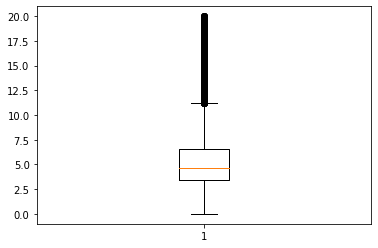

In [83]:
matplotlib.pyplot.boxplot(data.loc[data['last_price'] < 20*10**6, 'last_price']/10**6);

#### рассмотрим данные по общей площади

In [84]:
data['total_area'].describe()

count   23,613.00
mean        60.34
std         35.65
min         -1.00
25%         40.00
50%         52.00
75%         69.80
max        900.00
Name: total_area, dtype: float64

<AxesSubplot:>

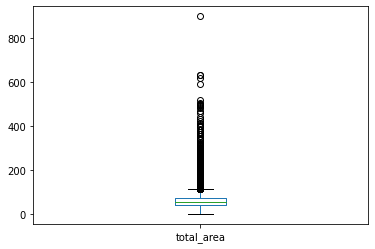

In [85]:
data['total_area'].plot(kind='box')

In [86]:
data.loc[data['total_area'] > 120, 'total_area'].count()

1058

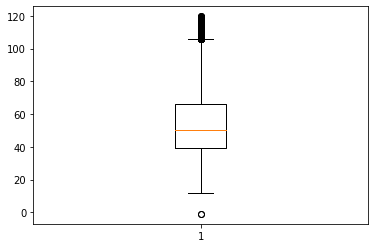

In [87]:
matplotlib.pyplot.boxplot(data.loc[data['total_area'] < 120, 'total_area']);

75% процентов данных располоагаются на отметке до 70 метров квадратных. рассмотрев данные, которые распределены на отметке свыше 120 метров квадратных можно предположить, что выше этой отметки жилье, которое не является массовым и учет его характеристик может исказить финальные выводы. верным решением будет просто не учитывать эти выбросы при анализе площади

#### рассмотрим данные о жилой площади

In [88]:
data['living_area'].describe()

count   21,743.00
mean        34.46
std         22.04
min         -1.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

In [89]:
data['living_area'].isna().sum()

1870

 в данных есть пропуски их можно заменить медианой, но в таком случае нужно чтобы жилая площадь не была больше общей.
 лучше оставить пропуски как есть.

<AxesSubplot:>

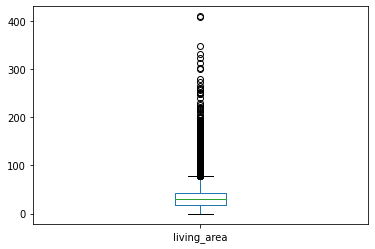

In [90]:
data['living_area'].plot(kind='box')

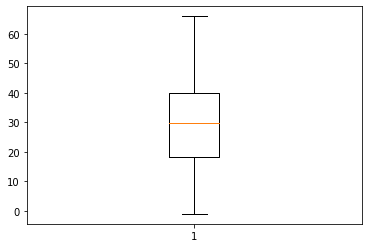

In [91]:
matplotlib.pyplot.boxplot(data.loc[data['living_area'] < 66, 'living_area']);

In [92]:
data.loc[data['living_area'] >= 66, 'living_area'].count()

1252

75% процентов данных располоагаются на отметке до 42.3 метров квадратных. рассмотрев данные, которые распределены на отметке свыше 80 метров квадратных можно предположить, что выше этой отметки жилье, которое не является массовым и учет его характеристик может исказить финальные выводы. скорее всего верным решением будет просто не учитывать эти выбросы при анализе площади

<AxesSubplot:ylabel='Frequency'>

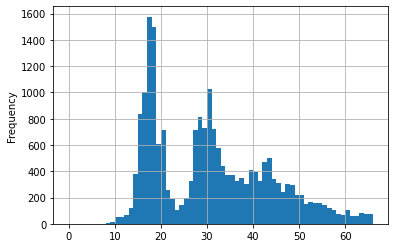

In [93]:
data['living_area'].plot(kind='hist', grid=True, bins=66, range=(0, 66))

#### рассмотрим данные о количестве комнат

In [94]:
data['rooms'].describe()

count   23,613.00
mean         2.07
std          1.08
min         -1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

<AxesSubplot:>

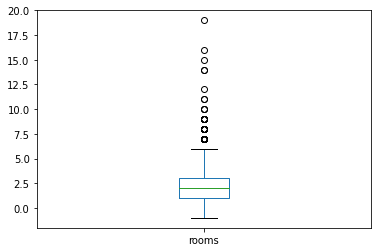

In [95]:
data['rooms'].plot(kind='box')

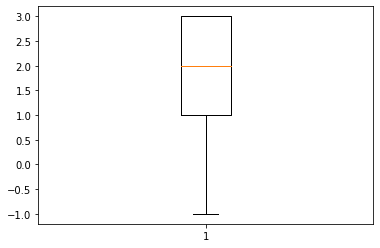

In [96]:
matplotlib.pyplot.boxplot(data.loc[data['rooms'] <= 3, 'rooms']);

In [97]:
data.loc[data['rooms'] > 4, 'rooms'].count()

519

75% процентов данных располоагаются на отметке 3 комнат. значения больше 4 носят единичный характер. скорее всего верным решением будет просто не учитывать эти данные при анализе площади

#### рассмотрим данные о размере кухни

In [98]:
data['kitchen_area'].describe()

count   21,382.00
mean        10.56
std          5.91
min         -1.00
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

в данных есть пропуски их можно заменить медианой, но в таком случае нужно чтобы сумма жилой площади и площадь кухни не была больше общей. лучше оставить пропуски как есть.

#### рассмотрим данные о дате публикации

в данных есть пропуски, заменим их медианой

In [99]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

приведем данные к типу datetime, так как с имеющимся форматом данных работать не получится

In [100]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### рассмотрим данные о сроках публикации

In [101]:
data['days_exposition'].describe()

count   20,441.00
mean       180.87
std        219.69
min         -1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

<s>минимальное значение в столбце - 1. предположим, что отсутствующее значение соответствует тому, что обьявление было снято до того, как пройдут сутки. и алгорритмы не успели тикнуть счетчик дней на еденицу.
в таком случае логично заменить пропущенные значения нулем. 

рассмотрим данные, с пропусками

In [102]:
data[data['days_exposition'].isna()]['first_day_exposition'].min()

Timestamp('2014-11-27 00:00:00')

минимальное значение в столбце "дата публикации 27 ноября 2014 года, значит столбец "days_exposition" заполняется после снятия обьявления. корректного заполнителя для данных пропусков нет.

<AxesSubplot:>

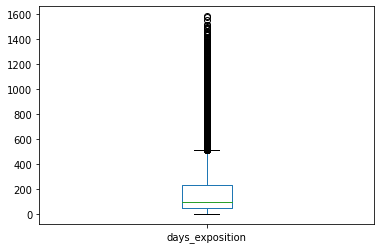

In [103]:
data['days_exposition'].plot(kind='box')

<AxesSubplot:>

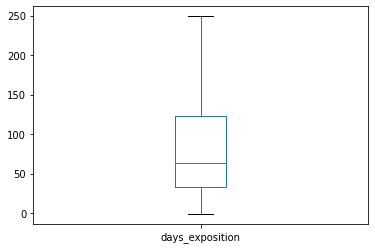

In [104]:
data.loc[data['days_exposition']<250, 'days_exposition'].plot(kind='box')

заменим тип на целочисленный

In [105]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

#### рассмотрим данные в studio и open_plan

In [106]:
data['studio'].describe()

count     23613
unique        3
top       False
freq      23465
Name: studio, dtype: object

In [107]:
data['studio'] = data['studio'].astype('bool')

In [108]:
data['open_plan'].describe()

count     23613
unique        3
top       False
freq      23544
Name: open_plan, dtype: object

In [109]:
data['open_plan'] = data['open_plan'].astype('bool')

изменения в этих данных не требуются

#### удалим мусорные данные и отмеченные, как выбросы

In [110]:
data_old_cou = data.shape[0]

In [111]:
data = data[data.locality_name != 'NaN']

In [112]:
data = data[(data.total_area > 0) & (data.total_area <= 120)]

In [113]:
data = data[(data.total_images < 25) & (data.total_images != -1)]

In [114]:
data = data[(data.rooms <= 3)]

In [115]:
data = data.loc[data['last_price'] <= 20*10**6]

In [116]:
data = data.drop_duplicates()

In [117]:
f'обьем удаленных данных - {1 - data.shape[0] / data_old_cou:.2%}'

'обьем удаленных данных - 9.44%'

In [118]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1660
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2016
balcony                     0
locality_name               0
airports_nearest         5340
city_centers_nearest     5324
parks_around3000         5323
parks_nearest           14555
ponds_around3000         5323
ponds_nearest           13609
days_exposition          2674
dtype: int64

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21384 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21384 non-null  int64         
 1   last_price            21384 non-null  int64         
 2   total_area            21384 non-null  float64       
 3   first_day_exposition  21384 non-null  datetime64[ns]
 4   rooms                 21384 non-null  int64         
 5   ceiling_height        21384 non-null  float64       
 6   floors_total          21384 non-null  int64         
 7   living_area           19724 non-null  float64       
 8   floor                 21384 non-null  int64         
 9   is_apartment          21384 non-null  object        
 10  studio                21384 non-null  bool          
 11  open_plan             21384 non-null  bool          
 12  kitchen_area          19368 non-null  float64       
 13  balcony         

#### ****краткие выводы:****
- в процессе предобработки данных были заменены пропуски (где это было возможно), исправлены некоректные названия и удалены явно мусорные данные
- востановлены значения последней стоимости и высоты потолков
- изменены типы данных в столбцах, где это было необходимо:
- - airports_nearest      с float64  на  int64 в связи с тем, что точнось до сантиметра, в данном случае, будет избыточна         
- - city_centers_nearest  с float64  на  int64 в связи с тем, что точнось до сантиметра, в данном случае, будет избыточна         
- - parks_around3000      с float64  на  int64 в связи с тем, что точнось до сантиметра, в данном случае, будет избыточна         
- - parks_nearest         с float64  на  int64 в связи с тем, что точнось до сантиметра, в данном случае, будет избыточна         
- - ponds_around3000      с float64  на  int64 в связи с тем, что точнось до сантиметра, в данном случае, будет избыточна         
- - ponds_nearest         с float64  на  int64 в связи с тем, что точнось до сантиметра, в данном случае, будет избыточна         
- - days_exposition       с float64  на  int64 в связи с тем, что точнось до сантиметра, в данном случае, будет избыточна
- - balcony, floors_total с float64  на  int64 в связи с тем, что число баконов и этажность здания не может быть дробной
- - last_price            с float64  на  int64 в связи с тем, что дробных значений поле не содержит
- - is_apartment          с строкового на bool тк там хронятся логические переменные 
- устранены неявные дубликаты в названиях населённых пунктов
- удалены значения, которые носили еденичный характер и выбивались из общего обьема данных
обьем удаленных данных составил - 9.44%
- так как часть данных была введена пользователем, а картографические данные были добавлены автоматически, можно рассмотреть следующие типы пропусков:
- - в картографических данных пропуски вероятне всего возникли из-за отсутствия адреса для обьекта недвижимости, а строительный адрес не отражен в базе данных;
- - в данных, вводимых пользователем пропуски могли появится из-за отсутствия информации у продавца недвижимости о этажности здания, высоте потолка, виде недвижимости и др;
- - в данных о балконах пропуски могут быть обусловлены отсутствием автоматического заполнения поля при сохранении (значение по умолчанию в БД);
- - пропуски в days_exposition могли быть обусловлены тем, что обьявление было снято до того, как пройдут сутки. алгорритмы не успели тикнуть счетчик дней на еденицу.

### Посчитайте и добавьте в таблицу новые столбцы

In [120]:
def ceiling_height_func(ceiling_height_value):
    if ceiling_height_value <= 2.7:
        return 'стандартные'
    if 2.7 < ceiling_height_value:
        return 'высокие'

In [121]:
data['ceiling_height_categ'] = data['ceiling_height'].apply(ceiling_height_func)

добавим в таблицу следующие столбцы:
    
1) цена одного квадратного метра
2) день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
3) месяц публикации объявления
4) год публикации объявления
5) тип этажа квартиры (значения — «первый», «последний», «другой»)
6) расстояние в км до центра города

In [122]:
data['price_met_sqrt'] = data.agg(lambda x: x['last_price'] / x['total_area'], axis=1)

In [123]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday

In [124]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [125]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [126]:
def floor_categ(frame_data: pd.DataFrame):
    if frame_data['floor'] == frame_data['floors_total']:
        return 'последний'
    elif frame_data['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

In [127]:
data['type_floor'] = data.agg(floor_categ, axis=1)

In [128]:
data['centers_nearest_km'] = \
data['city_centers_nearest'].agg(lambda x: abs(x // 1000))

data['centers_nearest_km'] = \
np.floor(pd.to_numeric(
    data['centers_nearest_km'], errors='coerce')
        ).astype('Int64')

#### краткие выводы
- в таблицу были добавлены следующие столбцы:

* `price_met_sqrt`      -   цена одного квадратного метра
* `week_day_exposition` -   день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
* `month_exposition`    -   месяц публикации объявления
* `year_exposition`     -   год публикации объявления
* `type_floor`          -   тип этажа квартиры (значения — «первый», «последний», «другой»)
* `centers_nearest_km`  -   расстояние в км до центра города

### Проведите исследовательский анализ данных

#### рассмотрим, опишем и постороим гистогоаммы следующих параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

In [129]:
data['total_area'].describe()

count   21,384.00
mean        53.01
std         18.35
min         12.00
25%         39.00
50%         49.10
75%         63.40
max        120.00
Name: total_area, dtype: float64

<AxesSubplot:>

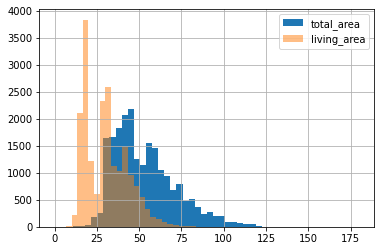

In [130]:
data['total_area'].hist(range=(0, 180), bins=50, legend=True)
data['living_area'].hist(range=(0, 100), bins=30, legend=True, alpha=0.5)

основная часть данных по общей площади находится в диапозоне значений от 40 до 69. резий рост предложений начинается от 30м^2 резкий спад отмечается в районе 75м^2. предложения свыше 180 носят единичный характер.

In [131]:
data['living_area'].describe()

count   19,724.00
mean        29.98
std         12.43
min          2.00
25%         18.00
50%         29.00
75%         39.00
max        100.00
Name: living_area, dtype: float64

график жилой площади повторяет график общей площади, за исключением провала в районе от 20 до 26м^2 и миеет смещение влево.  основная часть данных находится в диапозоне значений от 19 до 41м^2. 

In [132]:
data['kitchen_area'].describe()

count   19,368.00
mean         9.87
std          4.33
min          1.30
25%          7.00
50%          9.00
75%         11.20
max         64.00
Name: kitchen_area, dtype: float64

<AxesSubplot:>

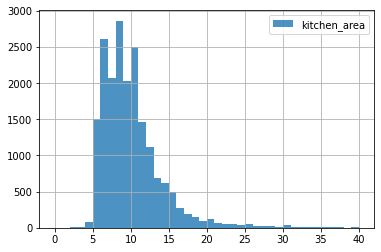

In [133]:
data['kitchen_area'].hist(range=(0, 40), bins=40, legend=True, alpha=0.8 )

гистограма площади кухонь выглядит аналогично гистограммам общей и жилой площади. смещенная влево, с явным пиком в районе медианы, половина всех значений находится в районе 7-11,5м^2 

In [134]:
data['last_price'].describe()

count       21,384.00
mean     5,165,873.47
std      2,797,515.00
min      1,000,000.00
25%      3,390,000.00
50%      4,500,000.00
75%      6,200,000.00
max     20,000,000.00
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

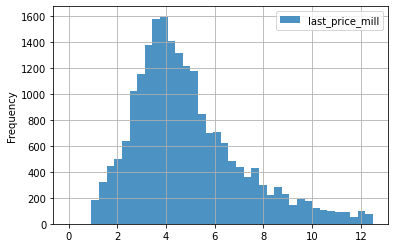

In [135]:
data['last_price_mill'] = data['last_price']/10**6
data['last_price_mill'].plot(x=data['last_price_mill'],
                             kind='hist', alpha=0.8,
                             bins=40, range=(0,12.5),
                             grid=True, legend=True)


гистограмма распределения цены обьекта предстовляет из себя *почти* номальное распределение, немного смещенное влево. с плечами в районе 2,3 и 5, и пиком в районе 4 млн 

<AxesSubplot:>

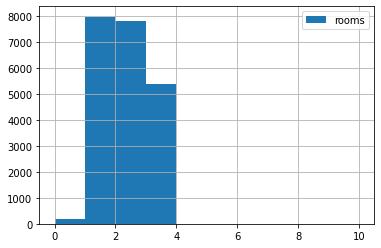

In [136]:
data['rooms'].hist(range=(0, 10),bins=10, legend=True, grid=True)

1, 2 и 3 комнатные квартиры занимают большую долю среди всех обьектов

<AxesSubplot:>

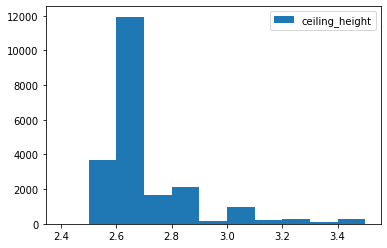

In [137]:
data['ceiling_height'].hist(range=(2.4, 3.5), bins=11, legend=True, grid=False)

основная часть обьектов недвижимости имеют высоту потолка в районе 2,6 метра

<AxesSubplot:>

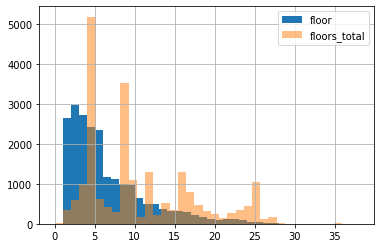

In [138]:
data['floor'].hist(range=(0, 33), bins=33, alpha=1, legend=True)
data['floors_total'].hist(range=(0, 38), bins=37, alpha=0.5, legend=True)

5-ти и  9-ти этахные дома являются самыми многочисленными на рынке, доля 12-ти и 16-ти этажных домов одинаковы

<AxesSubplot:>

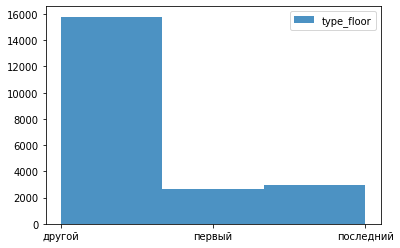

In [139]:
data['type_floor'].hist(bins=3, alpha=0.8, legend=True, grid=False)

доля первого и последнего этажа почти оинакова, гараэдо чаще представлены "другой" этаж 

<AxesSubplot:>

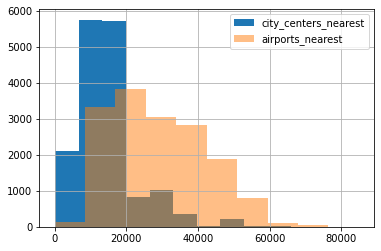

In [140]:
data['city_centers_nearest'].hist(bins=10, legend=True)
data['airports_nearest'].hist(bins=10, alpha=0.5, legend=True)

основная часть обьектов недвижимости расположена на удалении до 20км от центра города до 35-40км от аэропорта

<AxesSubplot:>

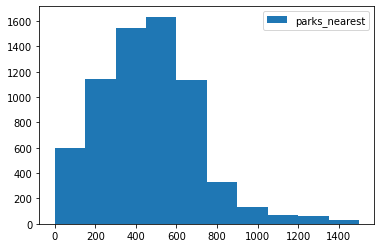

In [141]:
data['parks_nearest'].hist(range=(0, 1500), bins=10, legend=True, grid=False)

большая часть обьектов недвижимости, для которой установлено местоположение находится на растоянии от 200 до 600 метров от парка

<AxesSubplot:>

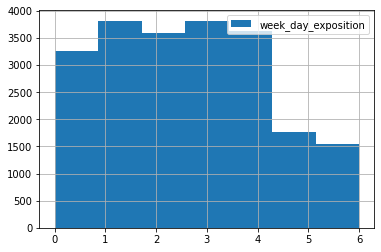

In [142]:
data['week_day_exposition'].hist(bins=7, legend=True)

<AxesSubplot:>

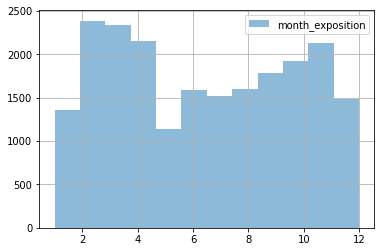

In [143]:
data['month_exposition'].hist(bins=12, alpha=0.5, legend=True)

из графиков видно, что реже всего обьявления публикуют во время выходных, также имеются провалы в январе и мае. скорее всего это связано с длинными выходными

#### рассмотрим, как быстро продавались квартиры

In [144]:
data['days_exposition'].describe()

count   18,710.00
mean       172.90
std        211.30
min          1.00
25%         44.00
50%         91.00
75%        218.00
max      1,580.00
Name: days_exposition, dtype: float64

минимальное значение (0) отбросим. максимальное установим в районе 75% (третий квартиль)

<AxesSubplot:>

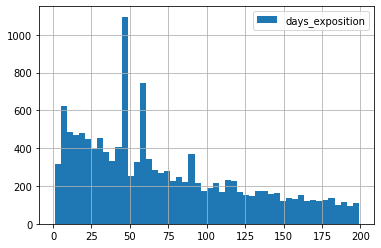

In [145]:
data[(data['days_exposition'] > 0) & (data['days_exposition'] < 200)]['days_exposition'].hist(bins=50, legend=True)

необычно долгими можно назвать максимальные значения от 1.580 дней примерно до года

среднее время продажи занимает до 60 дней

среднее время продажи занимает до 60 дней
необычайно быстрая продажа квартир (не учитывая снятые в день постановки) это в районе 10 дней
<p>пики в районе 45, 60 и 90 дней скорее всего это автоматическое снятие обьявления

In [146]:
print('среднее:', 
   data.loc[
       (data['days_exposition'] > 0) &
       (data['days_exposition'] < 200),
       'days_exposition'].mean())

среднее: 71.61510738452486


In [147]:
print('медиана:', 
    data.loc[
       (data['days_exposition'] > 0) &
       (data['days_exposition'] < 200),
       'days_exposition'].median())

медиана: 60.0


#### Факторы больше всего влияющие на общую (полную) стоимость объекта

In [148]:
data['last_price'].corr(data['total_area'])

0.7182794207344373

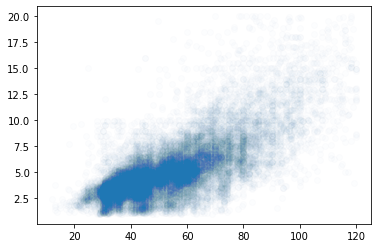

In [149]:
matplotlib.pyplot.scatter(y='last_price_mill', x='total_area', data=data, alpha=0.01)

зависимость цены от общей площади - прямая положительная

In [150]:
data['last_price'].corr(data['living_area'])

0.5758726973766065

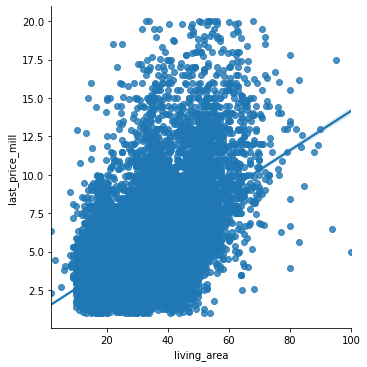

In [151]:
sns.lmplot(y='last_price_mill', x='living_area', data=data)

зависимость цены от жилой площади - прямая положительная

In [152]:
data['last_price'].corr(data['kitchen_area'])

0.5404150987534546

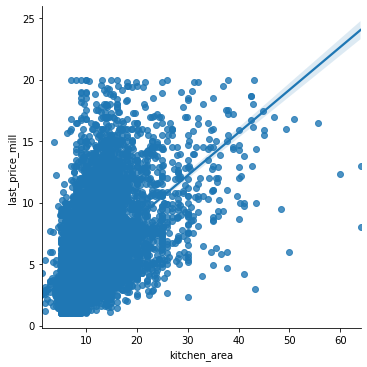

In [153]:
sns.lmplot(y='last_price_mill', x='kitchen_area', data=data)

зависимость цены от площади кухни - прямая положительная

In [154]:
data['last_price'].corr(data['rooms'])

0.4165914152236499

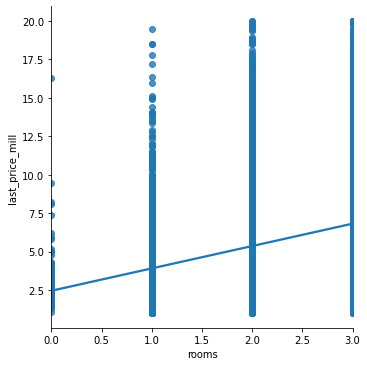

In [155]:

sns.lmplot(y='last_price_mill', x='rooms', data=data)

зависимость цены от числа комнат - прямая положительная

<AxesSubplot:xlabel='type_floor'>

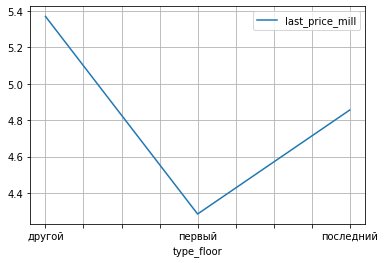

In [156]:
data.pivot_table(index='type_floor', values='last_price_mill', aggfunc='mean').plot(grid=True)

в среднем стоимость на последних этажах выше, чем на остальных, самая низкая стоимость на первом этаже

<AxesSubplot:xlabel='month_exposition'>

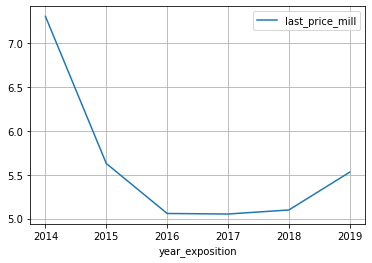

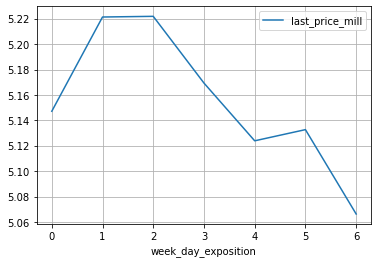

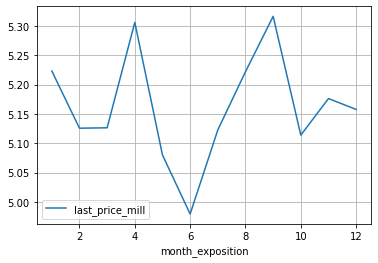

In [157]:
data.pivot_table(index='year_exposition', values='last_price_mill', aggfunc='mean').plot(grid=True)
data.pivot_table(index='week_day_exposition', values='last_price_mill', aggfunc='mean').plot(grid=True)
data.pivot_table(index='month_exposition', values='last_price_mill', aggfunc='mean').plot(grid=True)

в среднем обьявления с самой большой стоимостью появляются в мае и сентябре и занесены в базу в начале недели. с самой низкой в июне и в субботу
с 2014 по 2018 год отмечается падение общей стоимости жилья почти в 2 раза. 

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [158]:
(data.loc[data['locality_name']
          .isin(data.groupby(by='locality_name')
                .count().sort_values(by='rooms', ascending=False)
                .head(10).index)]
 .pivot_table(index='locality_name', values='price_met_sqrt')
 .sort_values(by='price_met_sqrt', ascending=False))

,price_met_sqrt
locality_name,
Санкт-Петербург,"109,670.84"
Пушкин,"102,047.56"
деревня Кудрово,"95,153.31"
поселок Парголово,"90,494.58"
поселок Мурино,"86,231.58"
поселок Шушары,"78,625.26"
Колпино,"76,055.20"
Гатчина,"68,943.90"
Всеволожск,"68,452.88"


самая высокая средняя стоимость квадратного метра "в топ-10 по числу обьявлений" в Санкт-Петербурге, самая низкая в Выборге 

In [159]:
(data.loc[data['locality_name']
          .isin(data.groupby(by='locality_name')
                .count().sort_values(by='rooms', ascending=False)
                .head(10).index)]
 .pivot_table(index='locality_name', values='price_met_sqrt')
 .sort_values(by='price_met_sqrt', ascending=False))

,price_met_sqrt
locality_name,
Санкт-Петербург,"109,670.84"
Пушкин,"102,047.56"
деревня Кудрово,"95,153.31"
поселок Парголово,"90,494.58"
поселок Мурино,"86,231.58"
поселок Шушары,"78,625.26"
Колпино,"76,055.20"
Гатчина,"68,943.90"
Всеволожск,"68,452.88"


#### выделить квартиры в Санкт-Петербурге с помощью столбца и вычислите среднюю цену каждого километра.

<AxesSubplot:xlabel='centers_nearest_km'>

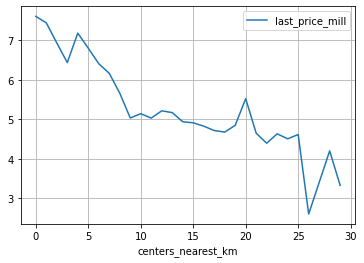

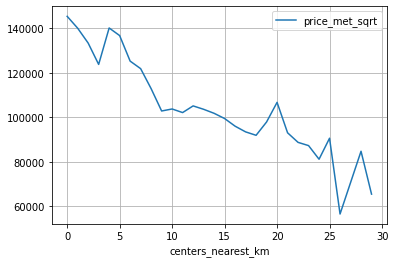

In [160]:
(data.loc[(data['locality_name'] == 'Санкт-Петербург') &
         (data['total_area'] <= data.total_area.quantile(0.75)) &
         (data['total_area'] >= data.total_area.quantile(0.25))]
 .pivot_table(index='centers_nearest_km', values='last_price_mill', aggfunc='mean')
 .sort_values(by='centers_nearest_km').plot(grid=True))

(data.loc[(data['locality_name'] == 'Санкт-Петербург') &
         (data['total_area'] <= data.total_area.quantile(0.75)) &
         (data['total_area'] >= data.total_area.quantile(0.25))]
 .pivot_table(index='centers_nearest_km', values='price_met_sqrt', aggfunc='mean')
 .sort_values(by='centers_nearest_km').plot(grid=True))

<AxesSubplot:xlabel='centers_nearest_km'>

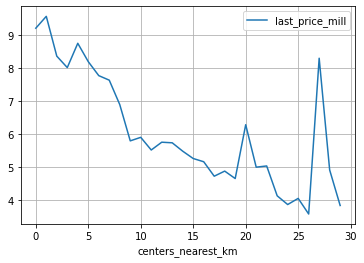

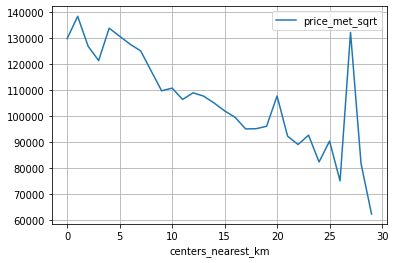

In [161]:
(data.loc[(data['locality_name'] == 'Санкт-Петербург')]
 .pivot_table(index='centers_nearest_km', values='last_price_mill', aggfunc='mean')
 .sort_values(by='centers_nearest_km').plot(grid=True))

(data.loc[(data['locality_name'] == 'Санкт-Петербург')]
 .pivot_table(index='centers_nearest_km', values='price_met_sqrt', aggfunc='mean')
 .sort_values(by='centers_nearest_km').plot(grid=True))

по всем данным при удалении от центра, на расстояние около 8 км, общая стоимость и цена за м^2 резко снижается, падение составляет почти 50% от стоимости на 0 км. 
резкий рост на отметке 27км может говорить наличии "элитного" жилого комплекса, где цена выше. 

по данным на межквартильном размахе, при удалении от центра, на расстояние около 8 км, общая стоимость и цена за м^2 резко снижается, падение составляет почти на 35% от стоимости на 0 км.

#### краткий вывод:
- - рассмотрены и описаны следующие параметры: - общая площадь; - жилая площадь; - площадь кухни; - цена объекта; - количество комнат; - высота потолков; - этаж квартиры; - тип этажа квартиры («первый», «последний», «другой»); - общее количество этажей в доме; - расстояние до центра города в метрах; - расстояние до ближайшего аэропорта; - расстояние до ближайшего парка; - день и месяц публикации объявления, построены гистограммы для каждого параметра
- - рассмотрено, как быстро продавались квартиры
- - - построины гистограммы.
- - - посчитаны среднее и медиана.
- - - описано, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.
- - рассмотрены факторы больше всего влияющие на общую (полную) стоимость объекта.
- - - построины графики, которые показывают зависимость цены от указанных ниже параметров:
- - - - общей площади; 
- - - - жилой площади; 
- - - - площади кухни; 
- - - - количество комнат; 
- - - - типа этажа, на котором расположена квартира (первый, последний, другой);
- - - -  даты размещения (день недели, месяц, год);
- - посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- - выделены квартиры в Санкт-Петербурге и вычислена средняя цена каждого километра. Описано, как стоимость объектов зависит от расстояния до центра города.


### Общий вывод

- в ходе изучения данных, были обнаружены пропуски в данных, рассмотрены используемые типы данных в таблице
- в процессе предобработки данных были заменены пропуски, исправлены некоректные названия и удалены явно мусорные данные
- - востановлены значения в некоторых полях
- - изменены типы данных в столбцах, где это было необходимо:
- - - airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, balcony, floors_total, last_price, is_apartment
- - устранены неявные дубликаты в названиях населённых пунктов
- также было посчитано и добавлено в таблицу: цена одного квадратного метра
- посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- посчитано и добавлено в таблицу: месяц публикации объявления
- посчитано и добавлено в таблицу: год публикации объявления
- посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- посчитано и добавлено в таблицу: расстояние в км до центра города


в ходе иссдедовательского анализа данных было выяснено, что:
- основная часть данных по общей площади находится в диапозоне значений от 40 до 69. резий рост предложений начинается от 30м^2 резкий спад отмечается в районе 75м^2. предложения свыше 180 носят единичный характер.
- похожее распределение демонситрирует и жилая площадь, за исключением провала в районе от 20 до 26м^2 и миеет смещение влево. основная часть данных находится в диапозоне значений от 19 до 41м^2. 
- гистограма площади кухонь выглядит аналогично гистограммам общей и жилой площади. смещенная влево, с явным пиком в районе медианы, половина всех значений находится в районе 7-11,5м^2
- гистограмма распределения цены обьекта предстовляет из себя почти номальное распределение, немного смещенное влево. с плечами в районе 2,5 и 5 и пиком в районе 4 млн 
- 1, 2 и 3 комнатные квартиры занимают большую долю среди всех обьектов
- основная часть обьектов недвижимости имеют высоту потолка в районе 2,6 метра
- 5-ти и  9-ти этахные дома являются самыми многочисленными на рынке, доля 12-ти и 16-ти этажных домов одинаковы
- основная часть обьектов недвижимости расположена на удалении до 20км от центра города до 35-40км от аэропорта
- большая часть обьектов недвижимости, для которой установлено местоположение находится на растоянии от 200 до 600 метров от парка
в ходе изучения времени продажи квартир обнаружено:
- необычно долгими можно назвать максимальные значения от 1.580 дней примерно до года
- среднее время продажи занимает до 60 дней, необычайно быстрая продажа квартир (не учитывая снятые в день постановки) это в районе 10 дней
факторы больше всего влияющие на общую (полную) стоимость объекта:
- зависимость цены от общей площади - прямая положительная, тут отмечается наибольшая зависимость от всей группы корреляция равна 0,71
- зависимость цены от жилой площади - прямая положительная, корреляция равна 0,57
- зависимость цены от площади кухни - прямая положительная, корреляция равна 0,54
- зависимость цены от числа комнат - прямая положительная, корреляция равна 0,41
- самая низкая стоимость на первом этаже 
- в среднем обьявления с самой большой стоимостью появляются в мае и сентябре и занесены в базу в начале недели. с самой низкой в июне и в субботу
- с 2014 по 2018 год отмечается падение общей стоимости жилья почти в 2 раза. 
в ходе подсчета средней стоимости одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений было выяснено, что самая высокая средняя стоимость квадратного метра "в топ-10 по числу обьявлений" в Санкт-Петербурге, самая низкая в Выборге 

при выделении квартир в Санкт-Петербурге и вычисления средней стоимости каждого километра обнаружено:
- по всем данным, при удалении от центра, на расстояние около 8 км, общая стоимость и цена за м^2 резко снижается, падение составляет почти 50% от стоимости на 0 км.
- резкий рост на отметке 27км может говорить наличии "элитного" жилого комплекса, где стоимость м^2 выше.
- по данным на межквартильном размахе, при удалении от центра, на расстояние около 8 км, общая стоимость и цена за м^2 резко снижается, падение составляет почти на 35% от стоимости на 0 км. стоимость на расстоянии примерно 27-28км резко снижается, что может говорить о том, что там могут находится обьекты недвижимости не входящие в выборку 
